In [1]:
from pylab import *
import scipy
import ruptures as rpt
%matplotlib inline

In [2]:
import mat2python
data,trial,classes=mat2python.mat2python(repetition_number=0)
#sampling rate 10 Hz
oxy=data[:,0:52]
roi1=[46,47,48]
roi2=[18,28,29]
roi3=[13, 23, 24]
signal=oxy[:,roi1+roi2+roi3]

 I am loading the 0 repetition of the protocol


### Optimal decision

(<matplotlib.figure.Figure at 0x7f4988136320>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49881b15c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f49880a64a8>], dtype=object))

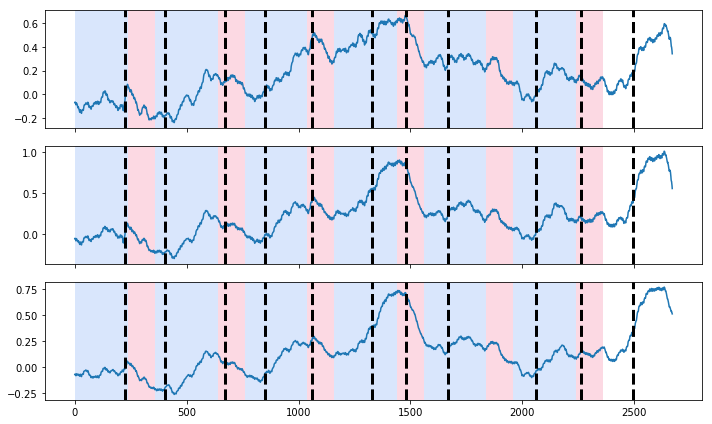

In [6]:
# detection
algo = rpt.Dynp(model="mahalanobis",min_size=10).fit(oxy[:,roi1+roi2+roi3]) #equivalent to rpt.Dynp(model="mahalanobis", params={"metric": inv(M)})
M_result = algo.predict(n_bkps=11)
rpt.display(oxy[:,roi1], trial,M_result)


In [ ]:
#savetxt("optimal_mahalanobis.dat",M_result)

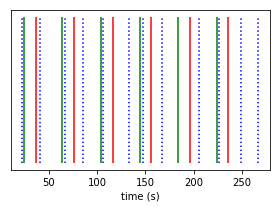

In [10]:
figure(figsize=(4,3))
t=arange(0,len(oxy))*0.1#it converts frame in time
#plot(t,oxy[:,roi1+roi2+roi3],lw="0.5",alpha=0.7)
xmin,xmax,ymin,ymax=gca().axis()
vlines(trial[::2]*0.1,ymin,ymax,linestyles="-",color="g")#start mental operation
vlines(trial[1::2]*0.1,ymin,ymax,linestyles="-",color="r")#start pause
vlines(array(M_result)*0.1,ymin,ymax,linestyles=":",color="b")#change point estimate
xlabel("time (s)")
tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',       # ticks along the right edge are off
    left='off',         # ticks along the left edge are off
    labelleft=False) # labels along the bottom edge are off
tight_layout()
#savefig("./figure/multiple_changepoint.pdf")

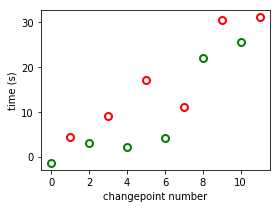

In [11]:
figure(figsize=(4,3))
plot(arange(0,len(M_result))[::2],(M_result[::2]-trial[::2])*0.1,"wo",mec="g",mew=2,ms=7)
plot(arange(0,len(M_result))[1::2],(M_result[1::2]-trial[1::2])*0.1,"wo",mec="r",mew=2,ms=7)
xlabel("changepoint number")
ylabel("time (s)")
tight_layout()
#savefig("./figure/delay.pdf")

### window based changepoint

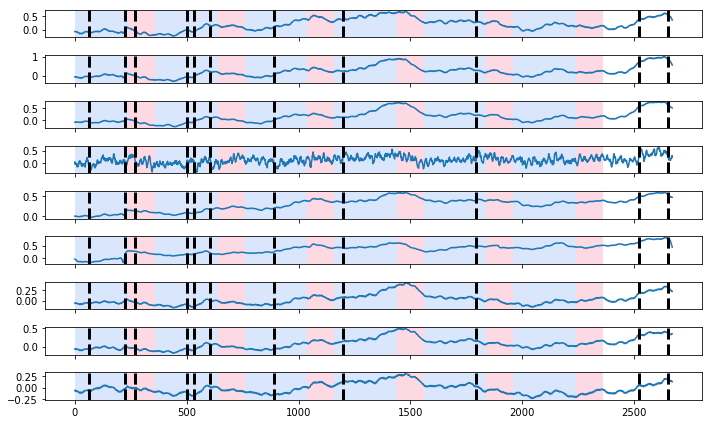

In [4]:
# change point detection
model="mahalanobis" # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=11)

# show results
rpt.show.display(signal,trial, my_bkps, figsize=(10, 6))
plt.show()

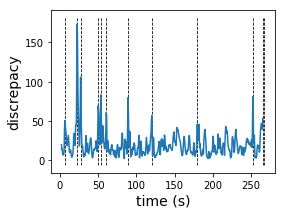

In [5]:
figure(figsize=(4,3))
peak_inds_arr = np.take(algo.inds,arange(0,len(algo.score)))# rupture maps in a misterius way the time. This map convers the internal mapping to frame. 
plot(peak_inds_arr/10,algo.score)
ymin,ymax=gca().get_ylim()
vlines(array(my_bkps)/10,ymin,ymax,linestyle="--",lw=0.8)
xlabel("time (s)",fontsize=14)
ylabel("discrepacy",fontsize=14)
#savefig("./figure/discrepancy.pdf")

In [23]:
my_bkps

[65, 225, 270, 500, 535, 605, 890, 1200, 1795, 2520, 2650, 2671]

In [29]:
from scipy.signal import argrelmax